## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [114]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '/users/mac/downloads/'

In [115]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: /users/mac/downloads/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
app_train["HOUSETYPE_MODE"].head()

0    block of flats
1    block of flats
2               NaN
3               NaN
4               NaN
Name: HOUSETYPE_MODE, dtype: object

In [117]:
app_train["HOUSETYPE_MODE"].unique()

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

In [118]:
print(type(app_train[["HOUSETYPE_MODE"]]))#dataframe
print(type(app_train["HOUSETYPE_MODE"]))#series
house_type_data=app_train[["TARGET","HOUSETYPE_MODE"]]
house_type_data.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,TARGET,HOUSETYPE_MODE
0,1,block of flats
1,0,block of flats
2,0,NaN
3,0,NaN
4,0,NaN


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [120]:
house_type_data["HOUSETYPE_MODE"].fillna("nan",inplace=True)

In [121]:
house_type_data["HOUSETYPE_MODE1"]=le.fit_transform(house_type_data["HOUSETYPE_MODE"])
house_type_data["HOUSETYPE_MODE1"].value_counts()

1    154297
0    150503
2      1499
3      1212
Name: HOUSETYPE_MODE1, dtype: int64

In [122]:
unique_house_type = house_type_data["HOUSETYPE_MODE"].unique()
unique_house_type

array(['block of flats', 'nan', 'terraced house', 'specific housing'],
      dtype=object)

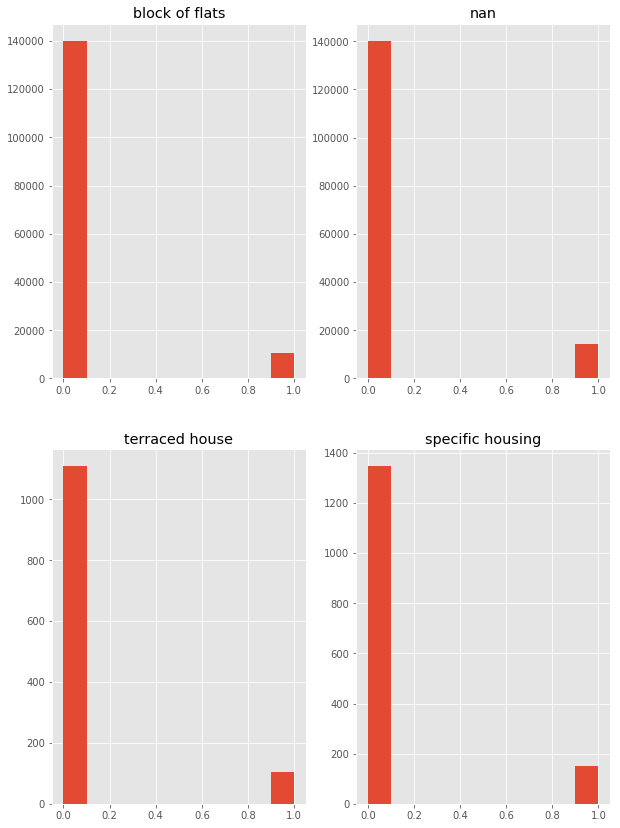

In [130]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
unique_house_type = house_type_data["HOUSETYPE_MODE"].unique()

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    house_type_data.loc[(house_type_data['HOUSETYPE_MODE'] == unique_house_type[i]), 'TARGET'].hist()
    
    plt.title(str(unique_house_type[i]))
plt.show()    

In [138]:
house_type_data.head()

,TARGET,HOUSETYPE_MODE,HOUSETYPE_MODE1
0,1,block of flats,0
1,0,block of flats,0
2,0,nan,1
3,0,nan,1
4,0,nan,1


In [137]:
house_type_data.loc[(house_type_data['HOUSETYPE_MODE'] == unique_house_type[0]), 'TARGET']
#1.house_type_data裡
#2.house_type_data['HOUSETYPE_MODE'] == unique_house_type[0]
#3.target值
#same as below
#

0         1
1         0
12        0
13        0
14        0
18        0
20        0
22        0
23        0
24        0
25        0
26        1
29        0
30        0
31        0
32        0
34        0
35        0
38        0
39        0
40        1
43        0
50        0
51        0
52        0
54        0
55        0
57        0
59        0
60        0
         ..
307459    0
307461    0
307462    0
307463    0
307464    0
307465    0
307466    0
307467    0
307468    0
307469    0
307474    0
307475    1
307476    0
307477    0
307478    0
307480    0
307482    0
307483    0
307486    0
307489    1
307495    0
307498    0
307500    0
307501    0
307505    0
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 150503, dtype: int64

In [139]:
house_type_data.loc[(house_type_data['HOUSETYPE_MODE'] == unique_house_type[0])]

,TARGET,HOUSETYPE_MODE,HOUSETYPE_MODE1
0,1,block of flats,0
1,0,block of flats,0
12,0,block of flats,0
13,0,block of flats,0
14,0,block of flats,0
18,0,block of flats,0
20,0,block of flats,0
22,0,block of flats,0
23,0,block of flats,0
24,0,block of flats,0
